Nama :Yahya Handarestanto

Nim   : 21.11.4365

Kelas: 21.if08

## Import Libraries

In [1]:
import datetime
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Acquisition

In [3]:
BBCA = pd.read_csv('/content/drive/MyDrive/PROYEK DATAMINING/BBCA.JK.csv')
# Display first 10 rows of the dataset
BBCA.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,5200.0,5200.0,5200.0,5200.0,4629.853516,0
1,2019-01-02,5200.0,5245.0,5200.0,5240.0,4665.468262,35956000
2,2019-01-03,5200.0,5220.0,5115.0,5180.0,4612.047363,72358000
3,2019-01-04,5175.0,5205.0,5125.0,5205.0,4634.305176,51465000
4,2019-01-07,5265.0,5325.0,5245.0,5245.0,4669.920410,73438000
5,2019-01-08,5230.0,5320.0,5205.0,5240.0,4665.468262,66247500
6,2019-01-09,5300.0,5320.0,5225.0,5255.0,4678.823242,84871000
7,2019-01-10,5300.0,5300.0,5190.0,5255.0,4678.823242,114314500
8,2019-01-11,5280.0,5300.0,5235.0,5250.0,4674.372070,84826500
9,2019-01-14,5220.0,5235.0,5150.0,5200.0,4629.853516,87547500


## Data Display

In [4]:
# Display the dataset
print(BBCA)

            Date    Open    High     Low   Close    Adj Close     Volume
0     2019-01-01  5200.0  5200.0  5200.0  5200.0  4629.853516          0
1     2019-01-02  5200.0  5245.0  5200.0  5240.0  4665.468262   35956000
2     2019-01-03  5200.0  5220.0  5115.0  5180.0  4612.047363   72358000
3     2019-01-04  5175.0  5205.0  5125.0  5205.0  4634.305176   51465000
4     2019-01-07  5265.0  5325.0  5245.0  5245.0  4669.920410   73438000
...          ...     ...     ...     ...     ...          ...        ...
1294  2024-04-05  9950.0  9950.0  9825.0  9825.0  9825.000000   70428600
1295  2024-04-16  9350.0  9575.0  9250.0  9475.0  9475.000000  283265900
1296  2024-04-17  9550.0  9675.0  9525.0  9525.0  9525.000000   95620700
1297  2024-04-18  9525.0  9575.0  9450.0  9475.0  9475.000000  127134000
1298  2024-04-19  9350.0  9500.0  9300.0  9475.0  9475.000000  147784300

[1299 rows x 7 columns]


In [5]:
# Data types
print(BBCA.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [6]:
# Statistical description
print(BBCA.describe())

               Open          High           Low         Close     Adj Close  \
count   1299.000000   1299.000000   1299.000000   1299.000000   1299.000000   
mean    7227.882987   7290.481139   7162.209392   7226.154734   6776.072419   
std     1362.270274   1366.020878   1362.809615   1365.703217   1475.388847   
min     4450.000000   4800.000000   4325.000000   4430.000000   3992.931641   
25%     6100.000000   6150.000000   6030.000000   6100.000000   5581.904297   
50%     6885.000000   6950.000000   6800.000000   6840.000000   6276.940430   
75%     8525.000000   8625.000000   8475.000000   8550.000000   8138.872314   
max    10400.000000  10400.000000  10150.000000  10325.000000  10092.431641   

             Volume  
count  1.299000e+03  
mean   8.362150e+07  
std    5.376153e+07  
min    0.000000e+00  
25%    5.397255e+07  
50%    7.206500e+07  
75%    9.844125e+07  
max    7.228279e+08  


In [7]:
print("Informasi Variabel Saham Bank BCA\n")
# Detailed information about the DataFrame
BBCA.info()

Informasi Variabel Saham Bank BCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1299 non-null   object 
 1   Open       1299 non-null   float64
 2   High       1299 non-null   float64
 3   Low        1299 non-null   float64
 4   Close      1299 non-null   float64
 5   Adj Close  1299 non-null   float64
 6   Volume     1299 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 71.2+ KB


# Checking for Null Values,Outlier, and Duplications

In [8]:
# Check for unique values
print(BBCA.nunique())

Date         1299
Open          412
High          418
Low           413
Close         420
Adj Close     671
Volume       1282
dtype: int64


In [9]:
# Check for null values
print(BBCA.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# Mendefinisikan fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(data, threshold=1.5):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Mendeteksi outlier di tiap fitur dengan threshold 1.5 (default)
outliers = detect_outliers(BBCA[['Open', 'High', 'Low', 'Close', 'Volume']])

# Menampilkan hasil
for column, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers detected in feature '{column}':")
        print(outlier_df)
        print()
    else:
        print(f"No outliers detected in feature '{column}'.")



No outliers detected in feature 'Open'.
No outliers detected in feature 'High'.
No outliers detected in feature 'Low'.
No outliers detected in feature 'Close'.
Outliers detected in feature 'Volume':
        Open    High     Low   Close     Volume
105   5655.0  5770.0  5655.0  5735.0  209923000
114   6000.0  6190.0  5810.0  5880.0  179238000
155   5880.0  5955.0  5765.0  5880.0  183296000
235   6330.0  6330.0  6270.0  6285.0  192783500
251   6500.0  6800.0  6440.0  6755.0  181804000
...      ...     ...     ...     ...        ...
1089  9300.0  9325.0  9050.0  9050.0  722827900
1212  8925.0  8975.0  8900.0  8975.0  205312100
1223  9125.0  9225.0  9075.0  9225.0  275013500
1292  9750.0  9800.0  9525.0  9525.0  177418400
1295  9350.0  9575.0  9250.0  9475.0  283265900

[65 rows x 5 columns]



## Data Preprocessing


Proses untuk mempersiapkan data terdiri dari beberapa proses sebagai berikut :
- Normalisasi yaitu untuk mengubah nilai kolom numerik dalam kumpulan data ke skala umum, tanpa mendistorsi perbedaan dalam rentang nilai.
- penghapusan nilai outlier
- Mengubah format data, dan mengurutkan data berdasarkan waktu/time

In [11]:

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return (data < lower_bound) | (data > upper_bound)

# Mendeteksi outlier pada fitur 'Volume'
outliers_volume = detect_outliers(BBCA['Volume'])

# Menghapus baris yang mengandung outlier pada fitur 'Volume'
BBCA_filtered = BBCA[~outliers_volume]

# Menampilkan hasil
print("Jumlah baris sebelum penghapusan outlier:", len(BBCA))
print("Jumlah baris setelah penghapusan outlier:", len(BBCA_filtered))
print(BBCA_filtered.head())


Jumlah baris sebelum penghapusan outlier: 1299
Jumlah baris setelah penghapusan outlier: 1234
         Date    Open    High     Low   Close    Adj Close    Volume
0  2019-01-01  5200.0  5200.0  5200.0  5200.0  4629.853516         0
1  2019-01-02  5200.0  5245.0  5200.0  5240.0  4665.468262  35956000
2  2019-01-03  5200.0  5220.0  5115.0  5180.0  4612.047363  72358000
3  2019-01-04  5175.0  5205.0  5125.0  5205.0  4634.305176  51465000
4  2019-01-07  5265.0  5325.0  5245.0  5245.0  4669.920410  73438000


In [12]:
# Convert date format and sort by date
BBCA['Date'] = pd.to_datetime(BBCA['Date']).dt.strftime('%Y-%m-%d')
BBCA.sort_values(by='Date', ascending=True, inplace=True)

In [13]:
# Selecting relevant columns
BBCA = BBCA[['Date', 'Volume', 'Open', 'High', 'Low', 'Close']]

Normalisasi

In [14]:
# Function for preprocessing data
def preprocessing_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')
    scaler = MinMaxScaler()
    data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])
    return data

BBCA_processed = preprocessing_data(BBCA)

<ipython-input-14-e39b66b843c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [15]:
# Menampilkan 5 baris pertama dari data yang telah dinormalisasi
print(BBCA_processed.head())

        Date    Volume      Open      High       Low     Close
0 2019-01-01  0.000000  0.126050  0.071429  0.150215  0.130619
1 2019-01-02  0.049744  0.126050  0.079464  0.150215  0.137405
2 2019-01-03  0.100104  0.126050  0.075000  0.135622  0.127226
3 2019-01-04  0.071200  0.121849  0.072321  0.137339  0.131467
4 2019-01-07  0.101598  0.136975  0.093750  0.157940  0.138253


## Data Visualization

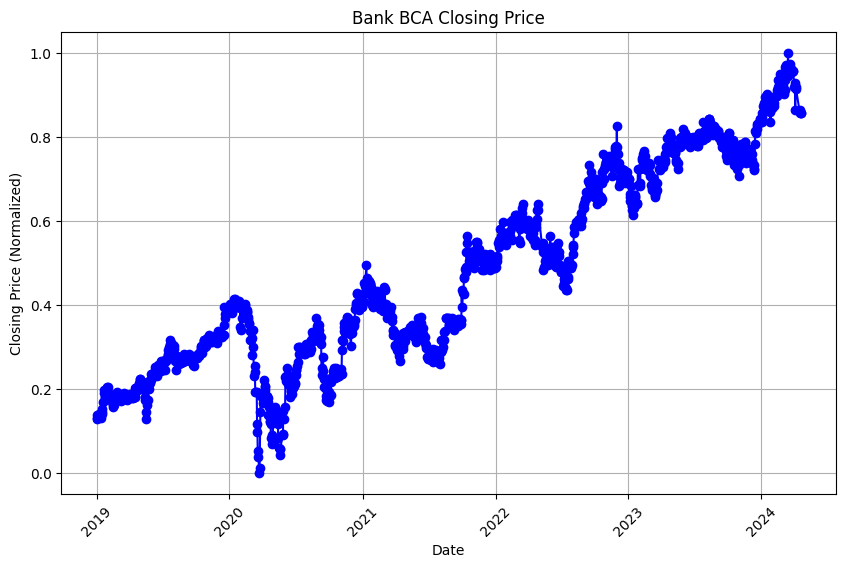

In [16]:
# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(BBCA_processed['Date'], BBCA_processed['Close'], color='blue', marker='o', linestyle='-')
plt.title('Bank BCA Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (Normalized)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.grid(True)
plt.show()

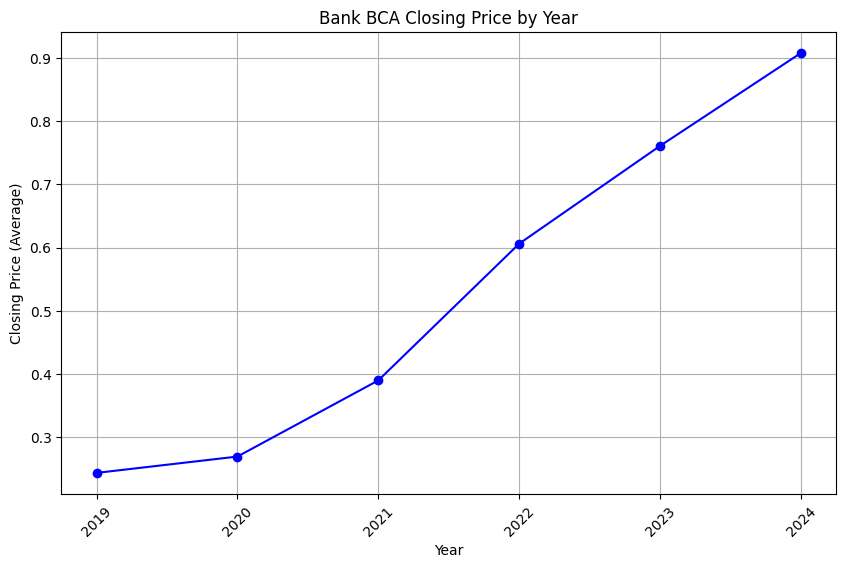

In [17]:
# Plot the average closing price by year
BBCA_processed['Year'] = BBCA_processed['Date'].dt.year
BBCA_yearly_close = BBCA_processed.groupby('Year')['Close'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(BBCA_yearly_close['Year'], BBCA_yearly_close['Close'], color='blue', marker='o', linestyle='-')
plt.title('Bank BCA Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price (Average)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Split Data for Training and Testing

In [18]:
# Mengonversi tanggal ke dalam representasi numerik
BBCA_processed['Date'] = pd.to_datetime(BBCA_processed['Date'])
BBCA_processed['Date'] = BBCA_processed['Date'].map(datetime.datetime.toordinal)

In [19]:
# Memisahkan fitur dan target
X = BBCA_processed[['Date', 'Open', 'High', 'Low', 'Volume']]
y = BBCA_processed['Close']


In [20]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Menampilkan jumlah data latih dan data uji
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih: 1039
Jumlah data uji: 260


## Linear Regression Model

In [22]:
# Membuat dan melatih model regresi linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Membuat prediksi
y_pred_lr = lr_model.predict(X_test)

In [24]:

# Evaluasi model

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Menyimpan metrik evaluasi dalam DataFrame
eval_metrics_lr = pd.DataFrame({'Model': ['Linear Regression'],
                                'Root Mean Squared Eror': [rmse_lr],
                                'Mean Squared Error': [mse_lr],
                                'Mean Absolute Error': [mae_lr],
                                'R-squared': [r2_lr]})


In [25]:
print("Linear Regression Model\n")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R-squared: {r2_lr}\n")

Linear Regression Model

Root Mean Squared Error: 0.007739857167480906
Mean Squared Error: 5.9905388973005555e-05
Mean Absolute Error: 0.005748969198676193
R-squared: 0.9988351772425779



In [54]:
# Function to create scatter plot for model evaluation
def create_scatter_plot(y_test, y_pred, title, color):
    plt.figure(figsize=(10, 6))

    # Original values
    plt.scatter(range(len(y_test)), y_test, color='red', label='Original Values')

    # Predicted values
    plt.scatter(range(len(y_pred)), y_pred, color=color, label='Predicted Values')

    plt.xlabel('Data Points')
    plt.ylabel('Close Price')
    plt.legend()
    plt.title(title)
    plt.show()

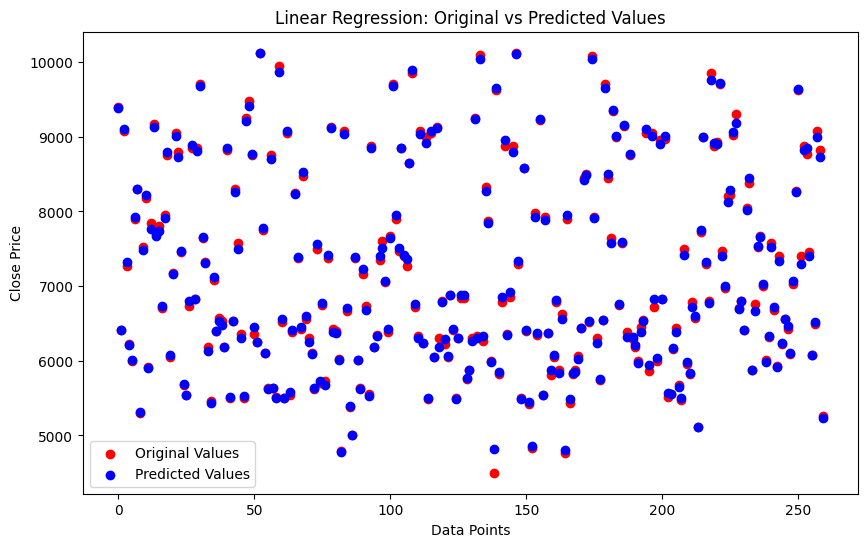

In [55]:
# Create scatter plot for Linear Regression
create_scatter_plot(y_test, y_pred_lr, 'Linear Regression: Original vs Predicted Values', 'blue')

## Random Forest Regressor Model

In [26]:
# Membuat dan melatih model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Membuat prediksi
y_pred_rf = rf_model.predict(X_test)

In [28]:
# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Menyimpan metrik evaluasi dalam DataFrame
eval_metrics_rf = pd.DataFrame({'Model': ['Random Forest Regressor'],
                                'Root Mean Squared Error': [rmse_rf],
                                'Mean Squared Error': [mse_rf],
                                'Mean Absolute Error': [mae_rf],
                                'R-squared': [r2_rf]})




In [29]:
print("Random Forest Regressor Model\n")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")

Random Forest Regressor Model

Mean Squared Error: 7.791577232392731e-05
Mean Absolute Error: 0.00673024727604881
R-squared: 0.9984849766219541
Root Mean Squared Error: 0.008826991125175515


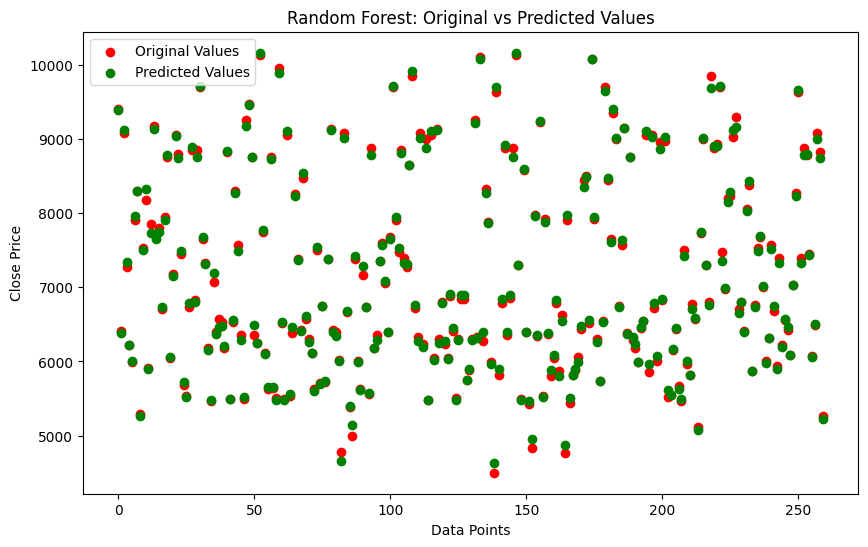

In [56]:
# Create scatter plot for Random Forest
create_scatter_plot(y_test, y_pred_rf, 'Random Forest: Original vs Predicted Values', 'green')

## Support Vector Regression Model

In [30]:
# Membuat dan melatih model Support Vector Regression
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [31]:
# Membuat prediksi
y_pred_svr = svr_model.predict(X_test)

In [32]:
# Evaluasi model

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

# Menyimpan metrik evaluasi dalam DataFrame
eval_metrics_svr = pd.DataFrame({'Model': ['Support Vector Regression'],
                                  'Root Mean Squared Error': [rmse_svr],
                                  'Mean Squared Error': [mse_svr],
                                  'Mean Absolute Error': [mae_svr],
                                  'R-squared': [r2_svr]})

In [33]:
print("Support Vector Regression Model\n")
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared: {r2_svr}")
print(f"Root Mean Squared Error: {rmse_svr}")


Support Vector Regression Model

Mean Squared Error: 0.009876632988806481
Mean Absolute Error: 0.09343330522513253
R-squared: 0.8079550593144021
Root Mean Squared Error: 0.09938125069049232


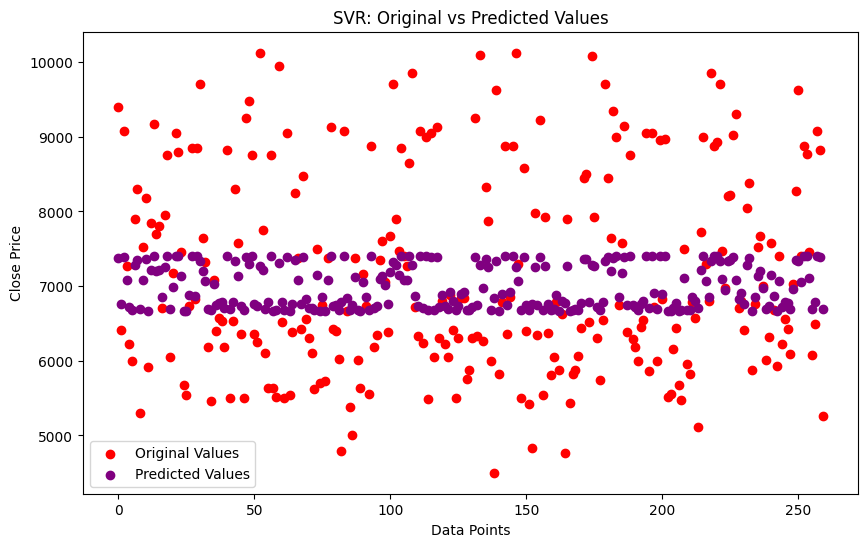

In [57]:
# Create scatter plot for SVR
create_scatter_plot(y_test, y_pred_svr, 'SVR: Original vs Predicted Values', 'purple')

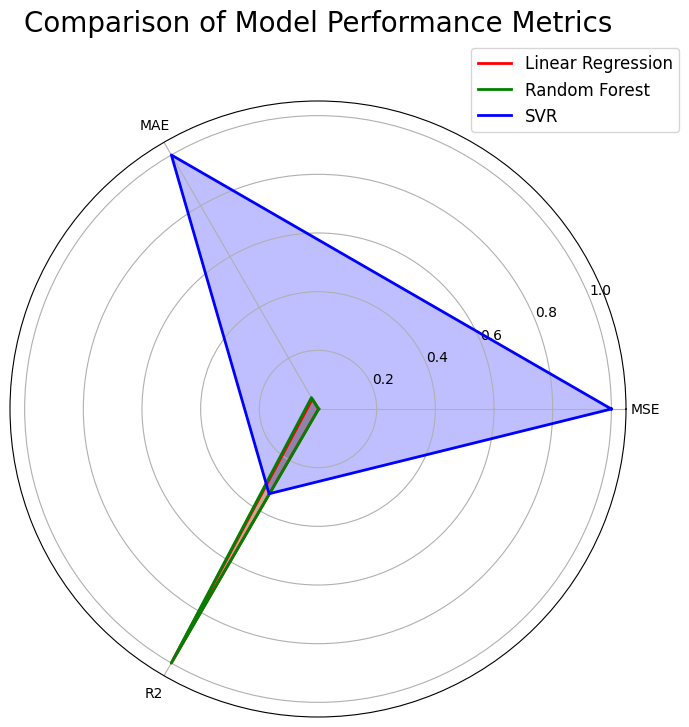

In [53]:
# Calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Linear Regression metrics
mse_lr, mae_lr, r2_lr = calculate_metrics(y_test, y_pred_lr)

# Random Forest metrics
mse_rf, mae_rf, r2_rf = calculate_metrics(y_test, y_pred_rf)

# SVR metrics
mse_svr, mae_svr, r2_svr = calculate_metrics(y_test, y_pred_svr)

# Normalize the metrics for comparison
def normalize_metrics(mse, mae, r2):
    mse_norm = mse / max(mse_lr, mse_rf, mse_svr)
    mae_norm = mae / max(mae_lr, mae_rf, mae_svr)
    r2_norm = r2 / max(r2_lr, r2_rf, r2_svr)
    return mse_norm, mae_norm, r2_norm

mse_lr_norm, mae_lr_norm, r2_lr_norm = normalize_metrics(mse_lr, mae_lr, r2_lr)
mse_rf_norm, mae_rf_norm, r2_rf_norm = normalize_metrics(mse_rf, mae_rf, r2_rf)
mse_svr_norm, mae_svr_norm, r2_svr_norm = normalize_metrics(mse_svr, mae_svr, r2_svr)

# Create a DataFrame with the normalized metrics
performance = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR'],
    'MSE': [mse_lr_norm, mse_rf_norm, mse_svr_norm],
    'MAE': [mae_lr_norm, mae_rf_norm, mae_svr_norm],
    'R2': [r2_lr_norm, r2_rf_norm, r2_svr_norm]
}

df_performance = pd.DataFrame(performance)

# Function to create radar chart
def create_radar_chart(df):
    categories = ['MSE', 'MAE', 'R2']
    N = len(categories)

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    colors = ['r', 'g', 'b']
    labels = df['Model']

    for i, color in enumerate(colors):
        values = df.iloc[i, 1:].tolist()
        values += values[:1]
        ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=labels[i])
        ax.fill(angles, values, color=color, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    plt.title("Comparison of Model Performance Metrics", size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize='large')

    plt.show()

# Create radar chart for the models' performance
create_radar_chart(df_performance)


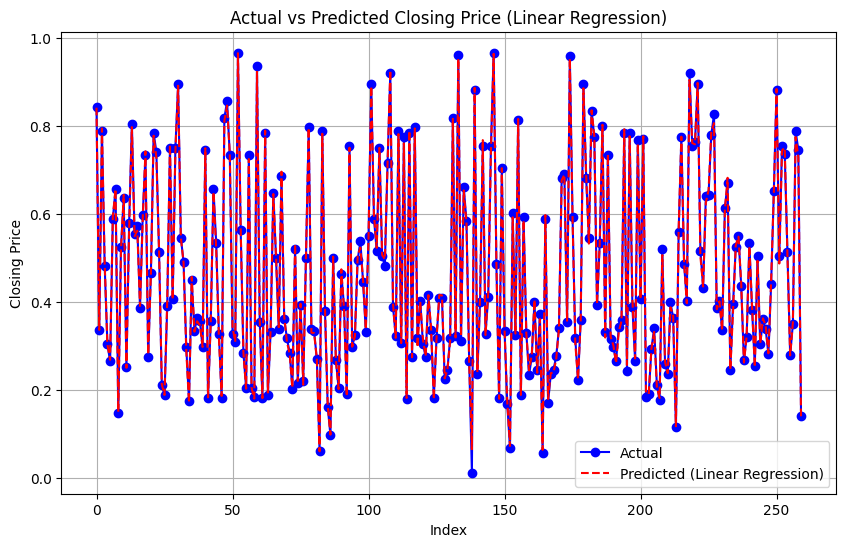

In [34]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))

# Plot actual vs predicted for Linear Regression
plt.plot(y_test.values, label='Actual', color='blue', marker='o')
plt.plot(y_pred_lr, label='Predicted (Linear Regression)', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Price (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

plt.show()

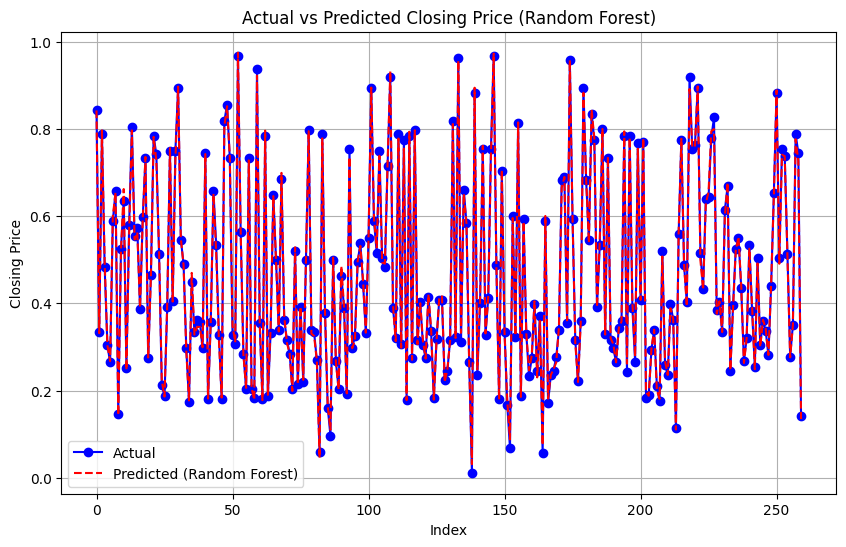

In [35]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))

# Plot actual vs predicted for Random Forest
plt.plot(y_test.values, label='Actual', color='blue', marker='o')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Price (Random Forest)')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

plt.show()

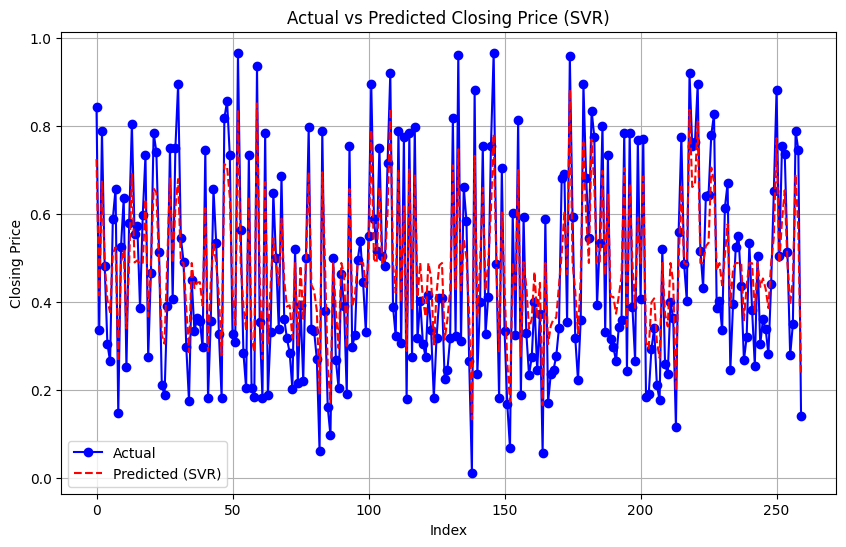

In [36]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))

# Plot actual vs predicted for SVR
plt.plot(y_test.values, label='Actual', color='blue', marker='o')
plt.plot(y_pred_svr, label='Predicted (SVR)', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Price (SVR)')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

plt.show()

## Visualisasi Hasil Prediksi Menggunakan Plotly

In [37]:
import plotly.graph_objs as go
import plotly.offline as py

# Membuat data metrik evaluasi untuk ketiga model
data_metrics = []

# Menambahkan metrik evaluasi Random Forest Regressor
trace_mse_rf = go.Bar(
    x=eval_metrics_rf['Model'],
    y=eval_metrics_rf['Mean Squared Error'],
    name='RF Mean Squared Error'
)

trace_mae_rf = go.Bar(
    x=eval_metrics_rf['Model'],
    y=eval_metrics_rf['Mean Absolute Error'],
    name='RF Mean Absolute Error'
)

trace_r2_rf = go.Bar(
    x=eval_metrics_rf['Model'],
    y=eval_metrics_rf['R-squared'],
    name='RF R-squared'
)

data_metrics.extend([trace_mse_rf, trace_mae_rf, trace_r2_rf])


In [38]:
# Menambahkan metrik evaluasi Support Vector Regression
trace_mse_svr = go.Bar(
    x=eval_metrics_svr['Model'],
    y=eval_metrics_svr['Mean Squared Error'],
    name='SVR Mean Squared Error'
)

trace_mae_svr = go.Bar(
    x=eval_metrics_svr['Model'],
    y=eval_metrics_svr['Mean Absolute Error'],
    name='SVR Mean Absolute Error'
)

trace_r2_svr = go.Bar(
    x=eval_metrics_svr['Model'],
    y=eval_metrics_svr['R-squared'],
    name='SVR R-squared'
)

data_metrics.extend([trace_mse_svr, trace_mae_svr, trace_r2_svr])

In [39]:
# Menambahkan metrik evaluasi Regresi Linear
trace_mse_lr = go.Bar(
    x=eval_metrics_lr['Model'],
    y=eval_metrics_lr['Mean Squared Error'],
    name='LR Mean Squared Error'
)

trace_mae_lr = go.Bar(
    x=eval_metrics_lr['Model'],
    y=eval_metrics_lr['Mean Absolute Error'],
    name='LR Mean Absolute Error'
)

trace_r2_lr = go.Bar(
    x=eval_metrics_lr['Model'],
    y=eval_metrics_lr['R-squared'],
    name='LR R-squared'
)

data_metrics.extend([trace_mse_lr, trace_mae_lr, trace_r2_lr])

# Membuat layout
layout_metrics = go.Layout(
    title='Model Evaluation Metrics',
    barmode='group',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Score' ),  # Menetapkan range dari 0.09 hingga 1.0 pada sumbu y
    legend=dict(x=0.09, y=1.0),
    hovermode='closest'
)

# Membuat plot
fig_metrics = go.Figure(data=data_metrics, layout=layout_metrics)

# Menampilkan plot
py.iplot(fig_metrics)

In [40]:

import plotly.graph_objs as go
import plotly.offline as py

# Menyimpan metrik evaluasi dalam DataFrame
eval_metrics_lr = pd.DataFrame({'Model': ['Linear Regression'],
                                'Mean Squared Error': [mse_lr],
                                'Mean Absolute Error': [mae_lr],
                                'R-squared': [r2_lr]})

eval_metrics_rf = pd.DataFrame({'Model': ['Random Forest Regressor'],
                                'Mean Squared Error': [mse_rf],
                                'Mean Absolute Error': [mae_rf],
                                'R-squared': [r2_rf]})

eval_metrics_svr = pd.DataFrame({'Model': ['Support Vector Regression'],
                                  'Mean Squared Error': [mse_svr],
                                  'Mean Absolute Error': [mae_svr],
                                  'R-squared': [r2_svr]})

# Menggabungkan semua metrik evaluasi dalam satu DataFrame
eval_metrics_all = pd.concat([eval_metrics_lr, eval_metrics_rf, eval_metrics_svr], ignore_index=True)

# Membuat visualisasi menggunakan Plotly
trace_mse = go.Bar(
    x=eval_metrics_all['Model'],
    y=eval_metrics_all['Mean Squared Error'],
    name='Mean Squared Error'
)

trace_mae = go.Bar(
    x=eval_metrics_all['Model'],
    y=eval_metrics_all['Mean Absolute Error'],
    name='Mean Absolute Error'
)

trace_r2 = go.Bar(
    x=eval_metrics_all['Model'],
    y=eval_metrics_all['R-squared'],
    name='R-squared'
)

data_metrics = [trace_mse, trace_mae, trace_r2]

layout_metrics = go.Layout(
    title='Model Evaluation Metrics',
    barmode='group',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Score'),
    legend=dict(x=0, y=1.0),
    hovermode='closest'
)

fig_metrics = go.Figure(data=data_metrics, layout=layout_metrics)

# Menampilkan plot
py.iplot(fig_metrics)


## Heatmap

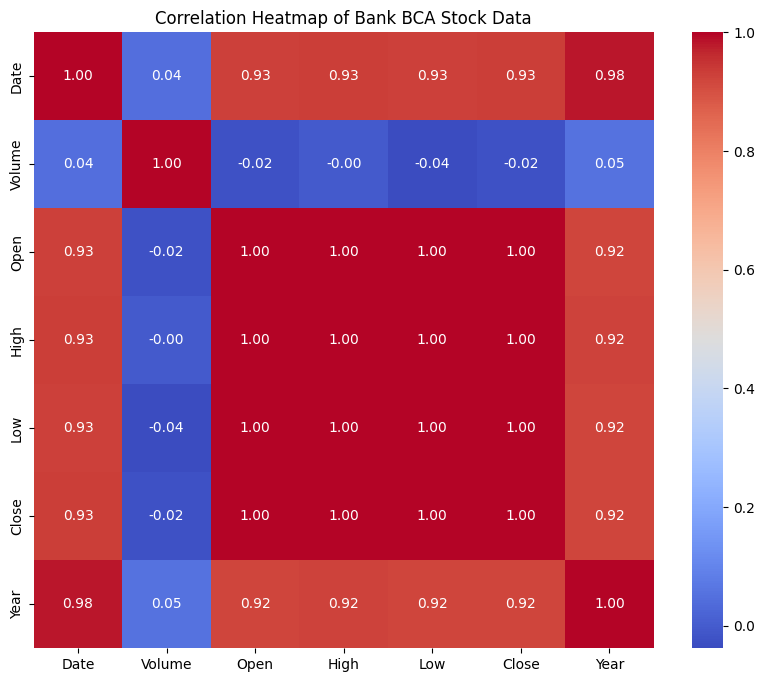

In [41]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = BBCA_processed.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Bank BCA Stock Data')
plt.show()
